In [9]:
# Importing Necessary Modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [7]:
# Reading the data using pandas 
df = pd.read_csv('train.csv')
 
# print first five rows of df
print(df.head(4))
 
# save the labels into a variable labels.
labels = df['label']
 
# Drop the label feature and store the pixel data in data.
data = df.drop("label", axis = 1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  

[4 rows

**Data-preprocessing**

In [5]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
 
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(42000, 784)


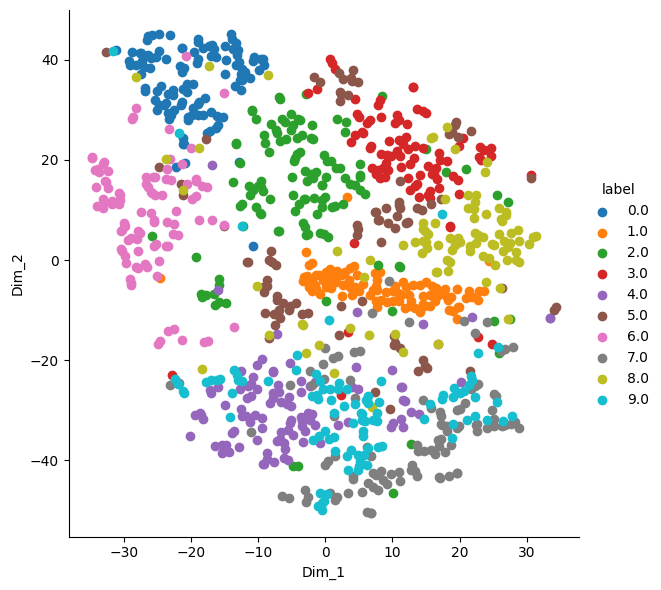

In [11]:
# TSNE
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]
labels_1000 = labels[0:1000]

model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
	columns =("Dim_1", "Dim_2", "label"))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue ="label", height = 6).map(
	plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.show()
